# Teleportation Protocol

In this notebook I illustrate the implementation of the teleportation protocol using qiskit.

In [ ]:
! pip install qiskit

In [44]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

Remember that the objective of the protocol is to send the state of a qbit to another remote qbit without using a quantum channel. The only information exchange involves sneding 2 bits of information through a classical channel.

In [55]:
# Quantum register with 3 qbits for protocol
q = QuantumRegister(3, name = 'q')
# Classical control registers of protocol
cxr = ClassicalRegister(1, name = 'cxr')
czr = ClassicalRegister(1, name = 'czr')
# Circuit simulator
qc_teleport = QuantumCircuit(q,cxr,czr)

Here choose an arbitary initial state that is normalized

In [56]:
# Initialise copied state
psi = [1/np.sqrt(2), 1/np.sqrt(2)]
qc_teleport.initialize(psi,0)
qc_teleport.barrier()

In [57]:
# Create entangled pair
qc_teleport.h(1)
qc_teleport.cx(1,2)
qc_teleport.barrier()

In [58]:
# Use CNOT to profit entanglement
qc_teleport.cx(0,1)
# Change to +,- basis
qc_teleport.h(0)
qc_teleport.barrier()

In [59]:
# Measure qbits
qc_teleport.measure(0,1)
qc_teleport.measure(1,0)

In [60]:
# Apply control gates with control classical register
qc_teleport.x(2).c_if(cxr,1)
qc_teleport.z(2).c_if(czr,1)

In [61]:
qc_teleport.draw()

┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐   »
  q_0: ┤ initialize(0.70711,0.70711) ├─░────────────░───■──┤ H ├─░─┤M├───»
       └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐»
  q_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├»
                                       ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘»
  q_2: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫─»
                                       ░      └───┘ ░            ░  ║  ║ »
cxr: 1/═════════════════════════════════════════════════════════════╬══╩═»
                                                                    ║  0 »
czr: 1/═════════════════════════════════════════════════════════════╩════»
                                                                    0    »
«                     
«  q_0: ──────────────
«                     
«  q_1: ──────────────
«        ┌───┐  ┌───┐ 
«  q_2: ─┤ X ├──┤ Z ├─
«        └─┬─┘  └─┬─┘ 
«       ┌──┴──┐   │   
«cxr: 1/╡ = 1 ╞═══╪═══
«       └─────┘┌──┴──┐
«czr: 1/═══════╡ = 1 ╞
«              └─────┘

Notice that the states of the original qbit and the intermediate qbit from the entangled pair are collapsed. However, the desired state is sent to the target qbit. Unlike classical algorithms, which allow for straightforward copying, this is not possible using quantum algorithms. The only possibilities for migration of qbit states are either generation of entangled states, or through quantum teleportation.

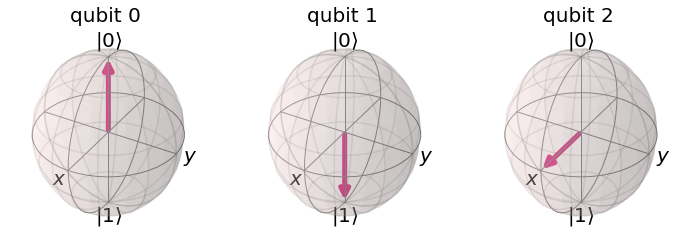

In [63]:
# Simulate statevector
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc_teleport, backend).result().get_statevector()
plot_bloch_multivector(out_vector)